In [1]:
# ## install required packages
# !pip install swig
# !pip install wrds
# !pip install pyportfolioopt
# ## install finrl library
# !pip install -q condacolab
# import condacolab
# condacolab.install()
# !apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx swig
# !pip install git+https://github.com/skazgor/FinRL.git

In [1]:
import pandas as pd
import json
import os 
import sys

# plot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dir = os.path.join('dataset', 'kaggle-dse')

files = os.listdir(dir)
files.sort()
files = [f for f in files if f not in ['securities.json', 'prices_2008.json']]
print(files)

['prices_2009.json', 'prices_2010.json', 'prices_2011.json', 'prices_2012.json', 'prices_2013.json', 'prices_2014.json', 'prices_2015.json', 'prices_2016.json', 'prices_2017.json', 'prices_2018.json', 'prices_2019.json', 'prices_2020.json', 'prices_2021.json', 'prices_2022.json']


In [3]:
# load all the json files
data = []
for f in files:
    with open(os.path.join(dir, f)) as file:
        data.append(json.load(file))
len(data)

14

In [4]:
# convert to pandas dataframe
dfs = []
for i in range(1,len(data)):
    dfs.append(pd.DataFrame(data[i]))
df = pd.concat(dfs)

In [5]:
df.shape

(1612197, 11)

In [6]:
df.head()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
0,2010-12-30 00:00:00,1JANATAMF,12.9,13.9,12.3,12.3,13.0,12.0,4708,124.8680,9623500
1,2010-12-29 00:00:00,1JANATAMF,11.8,12.3,11.2,11.7,12.0,11.3,1680,46.8126,3987000
2,2010-12-28 00:00:00,1JANATAMF,11.3,11.7,11.0,11.0,11.3,11.2,1077,19.3689,1698500
3,2010-12-27 00:00:00,1JANATAMF,11.3,11.5,11.0,11.5,11.2,11.4,932,13.9884,1249000
4,2010-12-26 00:00:00,1JANATAMF,11.6,11.8,11.2,11.6,11.4,11.5,1671,31.8171,2746500


In [7]:
# count the unique values in the column
df = df.drop_duplicates(subset=['date', 'trading_code'])
df['trading_code'].value_counts()

trading_code
GP            3090
SANDHANINS    3090
ICBIBANK      3090
SAMORITA      3090
IDLC          3090
              ... 
TB2Y1024        40
GIB             31
TB5Y1127        11
IICICL          11
ICICL            9
Name: count, Length: 954, dtype: int64

In [15]:
top_companies = [
    "GP",
    "BATBC",
    "SQURPHARMA",
    "RENATA",
    "BEXIMCO",
    "BERGERPBL",
    "MARICO",
    "BRACBANK",
    "BXPHARMA",
    "ISLAMIBANK",
    "DUTCHBANGL",
    "EBL",
    "POWERGRID",
    "SUMITPOWER",
    "OLYMPIC",
    "PUBALIBANK",
    "CITYBANK",
    "ALARABANK",
    "PRIMEBANK",
    "IFIC",
    "RECKITTBEN",
    "NBL",
    "BSRMSTEEL",
    "BANKASIA",
    "SHAHJABANK",
    "MPETROLEUM",
    "LINDEBD",
    "BSC",
    "JAMUNAOIL",
    "PADMAOIL",
    "SINGERBD",
    "ACI",
    "IBNSINA",
    "HRTEX",
    "SOUTHEASTB",
    "APEXFOODS",
    "SALAMCRST",
    "FEDERALINS",
    "DESCO",
    "BATASHOE",
]

len(top_companies)

40

In [16]:
new_df = df[df['trading_code'].isin(top_companies)]

new_df['date'].value_counts()

date
2010-12-30 00:00:00    40
2018-07-17 00:00:00    40
2018-06-05 00:00:00    40
2018-06-04 00:00:00    40
2018-06-03 00:00:00    40
                       ..
2014-08-24 00:00:00    40
2014-08-21 00:00:00    40
2014-08-20 00:00:00    40
2014-08-19 00:00:00    40
2022-01-02 00:00:00    40
Name: count, Length: 3090, dtype: int64

In [17]:
new_df['trading_code'].value_counts()

trading_code
ACI           3090
ALARABANK     3090
JAMUNAOIL     3090
LINDEBD       3090
MARICO        3090
MPETROLEUM    3090
NBL           3090
OLYMPIC       3090
PADMAOIL      3090
POWERGRID     3090
PRIMEBANK     3090
PUBALIBANK    3090
RECKITTBEN    3090
RENATA        3090
SALAMCRST     3090
SHAHJABANK    3090
SINGERBD      3090
SOUTHEASTB    3090
SQURPHARMA    3090
ISLAMIBANK    3090
IFIC          3090
IBNSINA       3090
BSC           3090
APEXFOODS     3090
BANKASIA      3090
BATASHOE      3090
BATBC         3090
BERGERPBL     3090
BEXIMCO       3090
BRACBANK      3090
BSRMSTEEL     3090
HRTEX         3090
BXPHARMA      3090
CITYBANK      3090
DESCO         3090
DUTCHBANGL    3090
EBL           3090
FEDERALINS    3090
GP            3090
SUMITPOWER    3090
Name: count, dtype: int64

In [18]:
df = new_df

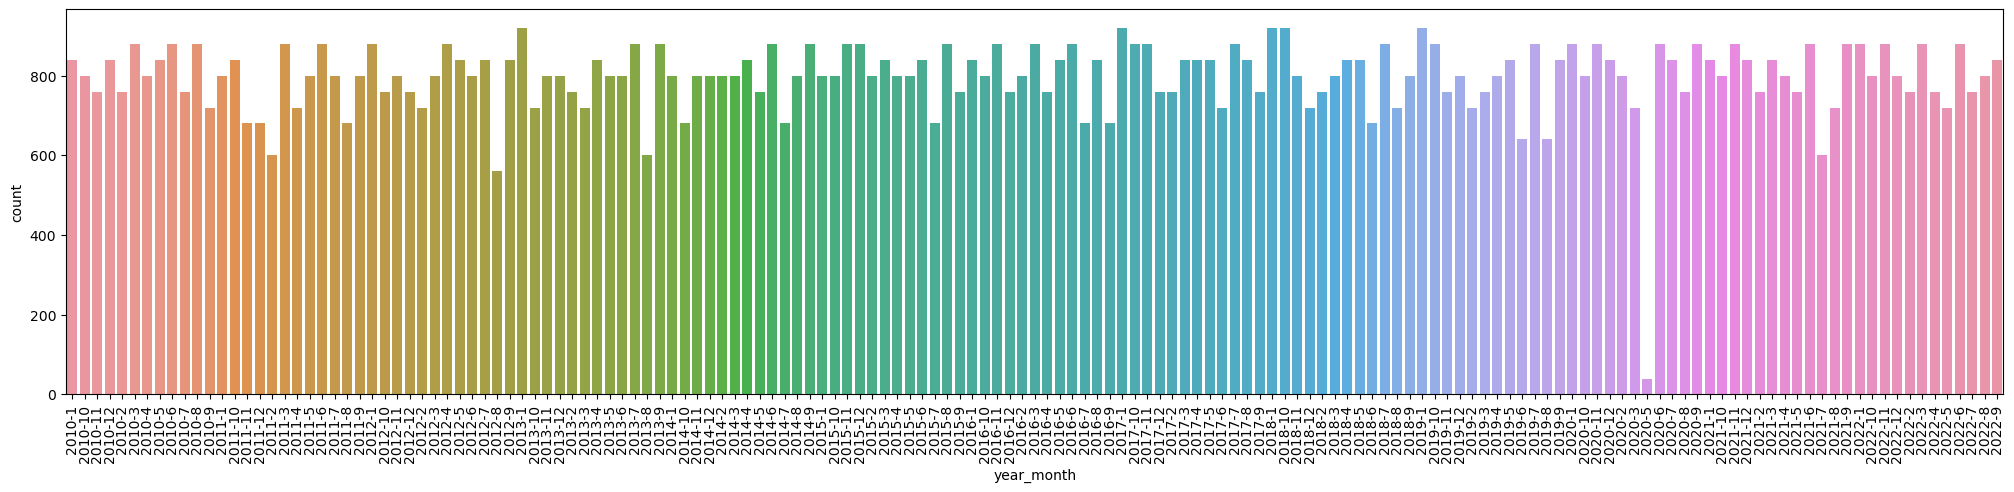

In [19]:
# per year minimum number of trading days
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Create a new column 'year_month' for plotting
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)

plt.figure(figsize=(25, 5))
sns.countplot(x='year_month', data=df, order=sorted(df['year_month'].unique()))
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [21]:
# print the zero count of each column
zero_counts = df.apply(lambda x: (x==0).sum())
print(zero_counts)

date                           0
trading_code                   0
last_traded_price           1786
high                        1786
low                         1786
opening_price                728
closing_price                 37
yesterdays_closing_price       0
trade                       1789
value_mn                    1837
volume                      1789
year                           0
month                          0
year_month                     0
dtype: int64


In [22]:
# Calculate the mean values of each month for the columns high, low, opening, and closing
# mean_values = df.groupby(['year', 'month', 'trading_code'])[['high', 'low', 'opening', 'closing']].mean()
# Replace the zero values with the mean values
new_df = df.copy()
new_df[['high', 'low', 'opening_price', 'closing_price']] = \
        new_df.groupby(['year', 'month', 'trading_code'])[['high', 'low', 'opening_price', 'closing_price']].transform(lambda x: x.replace(0, x.mean()))

# Verify the changes
# print the zero count of each column
zero_counts = new_df.apply(lambda x: (x==0).sum())
print(zero_counts)

date                           0
trading_code                   0
last_traded_price           1786
high                         312
low                          312
opening_price                 17
closing_price                  0
yesterdays_closing_price       0
trade                       1789
value_mn                    1837
volume                      1789
year                           0
month                          0
year_month                     0
dtype: int64


In [23]:
new_df[['high', 'low', 'opening_price', 'closing_price']] = \
        new_df.groupby(['year', 'trading_code'])[['high', 'low', 'opening_price', 'closing_price']].transform(lambda x: x.replace(0, x.mean()))

# Verify the changes
# print the zero count of each column
zero_counts = new_df.apply(lambda x: (x==0).sum())
print(zero_counts)

date                           0
trading_code                   0
last_traded_price           1786
high                           0
low                            0
opening_price                  0
closing_price                  0
yesterdays_closing_price       0
trade                       1789
value_mn                    1837
volume                      1789
year                           0
month                          0
year_month                     0
dtype: int64


In [24]:
df = new_df.copy()

In [25]:
df['year'].value_counts()

year
2017    9920
2010    9760
2015    9760
2022    9760
2018    9680
2016    9640
2021    9600
2013    9520
2014    9520
2012    9480
2019    9480
2011    9160
2020    8320
Name: count, dtype: int64

In [26]:
df['trading_code'].value_counts()

trading_code
ACI           3090
ALARABANK     3090
JAMUNAOIL     3090
LINDEBD       3090
MARICO        3090
MPETROLEUM    3090
NBL           3090
OLYMPIC       3090
PADMAOIL      3090
POWERGRID     3090
PRIMEBANK     3090
PUBALIBANK    3090
RECKITTBEN    3090
RENATA        3090
SALAMCRST     3090
SHAHJABANK    3090
SINGERBD      3090
SOUTHEASTB    3090
SQURPHARMA    3090
ISLAMIBANK    3090
IFIC          3090
IBNSINA       3090
BSC           3090
APEXFOODS     3090
BANKASIA      3090
BATASHOE      3090
BATBC         3090
BERGERPBL     3090
BEXIMCO       3090
BRACBANK      3090
BSRMSTEEL     3090
HRTEX         3090
BXPHARMA      3090
CITYBANK      3090
DESCO         3090
DUTCHBANGL    3090
EBL           3090
FEDERALINS    3090
GP            3090
SUMITPOWER    3090
Name: count, dtype: int64

In [27]:
# df['date'] = pd.to_datetime(df['date'])

# Create an empty DataFrame to store the sampled data
sampled_data = pd.DataFrame()

# Group the data by year
grouped_data = df.groupby('year')

# Sample 200 days for each year
for year, group in grouped_data:
    # Sample 200 unique days
    for t, g in group.groupby('trading_code'):
        sampled_days = g['date'].sample(208, replace=False)
        break
    # check the number of unique days
    print(len(sampled_days.unique()))
    
    # Filter the data for the sampled days
    sampled_year_data = group[group['date'].isin(sampled_days)]
    # print(len(sampled_year_data))
    
    # Ensure each sampled day includes all 30 trading codes
    sampled_year_data = sampled_year_data.groupby('date').filter(lambda x: len(x) == 30)
    
    # Append the sampled data to the final DataFrame
    sampled_data = pd.concat([sampled_data, sampled_year_data])

# Reset index of the final sampled data
sampled_data.reset_index(drop=True, inplace=True)

208
208
208
208
208
208
208
208
208
208
208
208
208


In [28]:
sampled_data['year'].value_counts()

Series([], Name: count, dtype: int64)

In [29]:

# change the zero values of the columns volume to hundred
df['volume'] = df['volume'].replace(0, 100)

In [30]:
# print the zero count of each column
zero_counts = df.apply(lambda x: (x==0).sum())
print(zero_counts)

date                           0
trading_code                   0
last_traded_price           1786
high                           0
low                            0
opening_price                  0
closing_price                  0
yesterdays_closing_price       0
trade                       1789
value_mn                    1837
volume                         0
year                           0
month                          0
year_month                     0
dtype: int64


In [31]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

/home/ruhul/RL/Stock-Trader/.conda/lib/python3.10/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [32]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

In [33]:
df.head()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume,year,month,year_month
2777,2010-12-30,ACI,373.5,374.0,368.0,368.0,372.6,372.5,135,6.5451,17600,2010,12,2010-12
2778,2010-12-29,ACI,373.0,377.8,369.0,377.8,372.5,373.2,87,2.8799,7750,2010,12,2010-12
2779,2010-12-28,ACI,373.2,375.0,367.3,374.9,373.2,366.7,167,6.9818,18750,2010,12,2010-12
2780,2010-12-27,ACI,367.0,370.0,365.7,369.9,366.7,367.6,130,4.7619,12950,2010,12,2010-12
2781,2010-12-26,ACI,369.9,371.0,365.0,365.3,367.6,367.9,117,3.9473,10700,2010,12,2010-12


In [34]:
df.drop(['year_month', 'last_traded_price', 'trade', 'value_mn','yesterdays_closing_price','month','year'], axis=1, inplace=True)
df.rename(columns={'trading_code': 'tic', 'opening_price': 'open', 'closing_price': 'close'}, inplace=True)
df.head()

,date,tic,high,low,open,close,volume
2777,2010-12-30,ACI,374.0,368.0,368.0,372.6,17600
2778,2010-12-29,ACI,377.8,369.0,377.8,372.5,7750
2779,2010-12-28,ACI,375.0,367.3,374.9,373.2,18750
2780,2010-12-27,ACI,370.0,365.7,369.9,366.7,12950
2781,2010-12-26,ACI,371.0,365.0,365.3,367.6,10700


In [35]:
df['day'] = pd.to_datetime(df['date']).dt.dayofweek
df['short_resistance']= df['high'].rolling(window=10,min_periods=0).max()
df['short_support']= df['low'].rolling(window=10,min_periods=0).min()
df['long_resistance']= df['high'].rolling(window=50,min_periods=0).max()
df['long_support']= df['low'].rolling(window=50,min_periods=0).min()
df = df.reset_index(drop=True)
df = df.sort_values(by=['date','tic']).reset_index(drop=True)

In [36]:
df.dtypes

date                datetime64[ns]
tic                         object
high                       float64
low                        float64
open                       float64
close                      float64
volume                       int64
day                          int32
short_resistance           float64
short_support              float64
long_resistance            float64
long_support               float64
dtype: object

In [37]:
# convert datetime to string
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

In [38]:
print(df.shape)
df.head()

(123600, 12)


,date,tic,high,low,open,close,volume,day,short_resistance,short_support,long_resistance,long_support
0,2010-01-03,ACI,449.90,444.00,449.9,446.50,91550,6,528.0,444.0,544.0,444.000000
1,2010-01-03,ALARABANK,530.00,516.00,530.0,522.25,128350,6,532.0,502.0,614.0,493.534091
2,2010-01-03,APEXFOODS,1239.00,1170.25,1239.0,1189.75,225,6,1355.0,1170.0,1355.0,1002.000000
3,2010-01-03,BANKASIA,459.75,437.00,437.0,452.00,298550,6,495.0,431.0,590.0,431.000000
4,2010-01-03,BATASHOE,534.90,518.00,527.0,524.40,39500,6,624.0,510.0,659.9,510.000000


In [39]:
data = df.copy()
df_price_pivot = data.pivot(index="date", columns="tic", values="close")
df_price_pivot = df_price_pivot.pct_change()
unique_date = data.date.unique()
# start after a year
start = 208
turbulence_index = [0] * start
# turbulence_index = [0]
count = 0
for i in range(start, len(unique_date)):
  current_price = df_price_pivot[df_price_pivot.index == unique_date[i]]
  # use one year rolling window to calcualte covariance
  hist_price = df_price_pivot[
      (df_price_pivot.index < unique_date[i])
      & (df_price_pivot.index >= unique_date[i - 208])
  ]
  # Drop tickers which has number missing values more than the "oldest" ticker
  filtered_hist_price = hist_price.iloc[
      hist_price.isna().sum().min() :
  ].dropna(axis=1)

  cov_temp = filtered_hist_price.cov()
  current_temp = current_price[[x for x in filtered_hist_price]] - np.mean(
      filtered_hist_price, axis=0
  )
  # cov_temp = hist_price.cov()
  # current_temp=(current_price - np.mean(hist_price,axis=0))

  temp = current_temp.values.dot(np.linalg.pinv(cov_temp)).dot(
      current_temp.values.T
  )
  if temp > 0:
      count += 1
      if count > 2:
          turbulence_temp = temp[0][0]
      else:
          # avoid large outlier because of the calculation just begins
          turbulence_temp = 0
  else:
      turbulence_temp = 0
  turbulence_index.append(turbulence_temp)
print(len(turbulence_index))
try:
  turbulence_index = pd.DataFrame(
      {"date": df_price_pivot.index, "turbulence": turbulence_index}
  )
except ValueError:
  raise Exception("Turbulence information could not be added.")

3090


In [40]:
turbulence_index['turbulence'].max()

17346.91764405746

In [41]:
df = df.merge(turbulence_index, on="date")
df['tic'].value_counts()

tic
ACI           3090
ALARABANK     3090
JAMUNAOIL     3090
LINDEBD       3090
MARICO        3090
MPETROLEUM    3090
NBL           3090
OLYMPIC       3090
PADMAOIL      3090
POWERGRID     3090
PRIMEBANK     3090
PUBALIBANK    3090
RECKITTBEN    3090
RENATA        3090
SALAMCRST     3090
SHAHJABANK    3090
SINGERBD      3090
SOUTHEASTB    3090
SQURPHARMA    3090
ISLAMIBANK    3090
IFIC          3090
IBNSINA       3090
BSC           3090
APEXFOODS     3090
BANKASIA      3090
BATASHOE      3090
BATBC         3090
BERGERPBL     3090
BEXIMCO       3090
BRACBANK      3090
BSRMSTEEL     3090
HRTEX         3090
BXPHARMA      3090
CITYBANK      3090
DESCO         3090
DUTCHBANGL    3090
EBL           3090
FEDERALINS    3090
GP            3090
SUMITPOWER    3090
Name: count, dtype: int64

In [42]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=False,
                    use_turbulence=False,
                    user_defined_feature = False)
# turbulance is giving error
df = df.fillna(value = 0)
processed = fe.preprocess_data(df)

Successfully added technical indicators


In [43]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [44]:
print(processed_full.shape)
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

(123600, 21)


,date,tic,high,low,open,close,volume,day,short_resistance,short_support,...,long_support,turbulence,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2010-01-03,ACI,449.90000,444.000000,449.9,446.50,91550.0,6.0,528.0,444.000000,...,444.000000,0.0,0.0,481.530108,429.769892,100.0,66.666667,100.0,446.50,446.50
1,2010-01-03,ALARABANK,530.00000,516.000000,530.0,522.25,128350.0,6.0,532.0,502.000000,...,493.534091,0.0,0.0,481.530108,429.769892,100.0,66.666667,100.0,522.25,522.25
2,2010-01-03,APEXFOODS,1239.00000,1170.250000,1239.0,1189.75,225.0,6.0,1355.0,1170.000000,...,1002.000000,0.0,0.0,481.530108,429.769892,100.0,66.666667,100.0,1189.75,1189.75
3,2010-01-03,BANKASIA,459.75000,437.000000,437.0,452.00,298550.0,6.0,495.0,431.000000,...,431.000000,0.0,0.0,481.530108,429.769892,100.0,66.666667,100.0,452.00,452.00
4,2010-01-03,BATASHOE,534.90000,518.000000,527.0,524.40,39500.0,6.0,624.0,510.000000,...,510.000000,0.0,0.0,481.530108,429.769892,100.0,66.666667,100.0,524.40,524.40
5,2010-01-03,BATBC,436.00000,407.600000,414.9,432.10,467500.0,6.0,464.9,407.600000,...,407.600000,0.0,0.0,481.530108,429.769892,100.0,66.666667,100.0,432.10,432.10
6,2010-01-03,BERGERPBL,679.90000,626.000000,639.0,666.80,123850.0,6.0,722.0,626.000000,...,555.000000,0.0,0.0,481.530108,429.769892,100.0,66.666667,100.0,666.80,666.80
7,2010-01-03,BEXIMCO,321.00000,310.100000,310.1,319.90,2230100.0,6.0,328.7,310.100000,...,310.100000,0.0,0.0,481.530108,429.769892,100.0,66.666667,100.0,319.90,319.90
8,2010-01-03,BRACBANK,705.00000,680.250000,705.0,687.25,199600.0,6.0,773.0,680.250000,...,542.000000,0.0,0.0,481.530108,429.769892,100.0,66.666667,100.0,687.25,687.25
9,2010-01-03,BSC,1814.22619,1740.761905,5490.0,5490.00,100.0,6.0,5221.0,1740.761905,...,172.727273,0.0,0.0,481.530108,429.769892,100.0,66.666667,100.0,5490.00,5490.00


In [45]:
mvo_df = processed_full.sort_values(['date','tic'],ignore_index=True)[['date','tic','close']]

In [46]:
TRAIN_START_DATE = '2010-01-01'
TRAIN_END_DATE = '2020-12-31'
TRADE_START_DATE = '2021-01-01'
TRADE_END_DATE = '2022-12-31'
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

104240
19360


In [47]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 40, State Space: 401


In [48]:
buy_cost_list = sell_cost_list = [0.0005] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 2000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4,
    "cash_penalty_percentage": 0.1
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

StockTradingEnv - Init


In [49]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [50]:
agent = DRLAgent(env = env_train)

if_using_a2c = True
if_using_ddpg = True
if_using_ppo = True
if_using_td3 = True
if_using_sac = True

In [51]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

if if_using_a2c:
  # set up logger
  tmp_path = RESULTS_DIR + '/a2c'
  new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_a2c.set_logger(new_logger_a2c)


{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device
Logging to results/a2c


In [53]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=100000) if if_using_a2c else None

-------------------------------------
| time/                 |           |
|    fps                | 105       |
|    iterations         | 100       |
|    time_elapsed       | 4         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -56.8     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 274       |
|    policy_loss        | -166      |
|    reward             | 1.5115271 |
|    std                | 1         |
|    value_loss         | 9.76      |
-------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 101         |
|    iterations         | 200         |
|    time_elapsed       | 9           |
|    total_timesteps    | 1000        |
| train/                |             |
|    entropy_loss       | -56.8       |
|    explained_variance | 0           |
|    learning_rate      | 0.0007

In [54]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

if if_using_ddpg:
  # set up logger
  tmp_path = RESULTS_DIR + '/ddpg'
  new_logger_ddpg = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ddpg.set_logger(new_logger_ddpg)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device
Logging to results/ddpg


In [55]:
trained_ddpg = agent.train_model(model=model_ddpg,
                             tb_log_name='ddpg',
                             total_timesteps=100000) if if_using_ddpg else None

---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 48       |
|    time_elapsed    | 215      |
|    total_timesteps | 10424    |
| train/             |          |
|    actor_loss      | 7.66     |
|    critic_loss     | 2.02     |
|    learning_rate   | 0.001    |
|    n_updates       | 10323    |
|    reward          | 0.03029  |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 48       |
|    time_elapsed    | 431      |
|    total_timesteps | 20848    |
| train/             |          |
|    actor_loss      | -0.296   |
|    critic_loss     | 0.454    |
|    learning_rate   | 0.001    |
|    n_updates       | 20747    |
|    reward          | 0.03029  |
---------------------------------
day: 2605, episode: 50
begin_total_asset: 2000000.00
end_total_asset: 648820.75
total_reward: -1351179.25
total_cost

In [56]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

if if_using_ppo:
  # set up logger
  tmp_path = RESULTS_DIR + '/ppo'
  new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ppo.set_logger(new_logger_ppo)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device
Logging to results/ppo


In [57]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=100000) if if_using_ppo else None

-----------------------------------
| time/              |            |
|    fps             | 61         |
|    iterations      | 1          |
|    time_elapsed    | 33         |
|    total_timesteps | 2048       |
| train/             |            |
|    reward          | 0.15207328 |
-----------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 2           |
|    time_elapsed         | 70          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.019254636 |
|    clip_fraction        | 0.222       |
|    clip_range           | 0.2         |
|    entropy_loss         | -56.8       |
|    explained_variance   | 0.00744     |
|    learning_rate        | 0.00025     |
|    loss                 | 49.4        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0231     |
|   

### Agent 4: TD3

In [ ]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100, 
              "buffer_size": 1000000, 
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

if if_using_td3:
  # set up logger
  tmp_path = RESULTS_DIR + '/td3'
  new_logger_td3 = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_td3.set_logger(new_logger_td3)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device
Logging to results/td3


/home/ruhul/RL/Stock-Trader/.conda/lib/python3.10/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 2.54GB > 0.90GB
  warnings.warn(


In [ ]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=100000) if if_using_td3 else None

-----------------------------------
| time/              |            |
|    episodes        | 4          |
|    fps             | 45         |
|    time_elapsed    | 230        |
|    total_timesteps | 10424      |
| train/             |            |
|    actor_loss      | 81.3       |
|    critic_loss     | 1.83       |
|    learning_rate   | 0.001      |
|    n_updates       | 10323      |
|    reward          | -1.9798098 |
-----------------------------------
-----------------------------------
| time/              |            |
|    episodes        | 8          |
|    fps             | 45         |
|    time_elapsed    | 461        |
|    total_timesteps | 20848      |
| train/             |            |
|    actor_loss      | 132        |
|    critic_loss     | 3.27       |
|    learning_rate   | 0.001      |
|    n_updates       | 20747      |
|    reward          | -1.9798098 |
-----------------------------------
day: 2605, episode: 70
begin_total_asset: 1000000.00
end_total_a

### Agent 5: SAC

In [ ]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

if if_using_sac:
  # set up logger
  tmp_path = RESULTS_DIR + '/sac'
  new_logger_sac = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_sac.set_logger(new_logger_sac)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device
Logging to results/sac


In [ ]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=100000) if if_using_sac else None

------------------------------------
| time/              |             |
|    episodes        | 4           |
|    fps             | 38          |
|    time_elapsed    | 268         |
|    total_timesteps | 10424       |
| train/             |             |
|    actor_loss      | 385         |
|    critic_loss     | 1.41e+03    |
|    ent_coef        | 0.0927      |
|    ent_coef_loss   | -90.9       |
|    learning_rate   | 0.0001      |
|    n_updates       | 10323       |
|    reward          | -0.96567595 |
------------------------------------
-----------------------------------
| time/              |            |
|    episodes        | 8          |
|    fps             | 36         |
|    time_elapsed    | 565        |
|    total_timesteps | 20848      |
| train/             |            |
|    actor_loss      | 293        |
|    critic_loss     | 9.83       |
|    ent_coef        | 0.0326     |
|    ent_coef_loss   | -134       |
|    learning_rate   | 0.0001     |
|    n_update

In [ ]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [ ]:
insample_risk_indicator.turbulence.describe()

count     2606.000000
mean        47.882787
std        296.336988
min          0.000000
25%         14.500062
50%         24.600754
75%         42.544783
max      14167.284980
Name: turbulence, dtype: float64

In [ ]:
insample_risk_indicator.turbulence.quantile(0.996)

634.368657157683

In [ ]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 60, **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

StockTradingEnv - Init


In [58]:
trade.head()

,date,tic,high,low,open,close,volume,day,short_resistance,short_support,...,long_support,turbulence,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2021-01-03,ALARABANK,22.1,21.5,22.1,21.9,1117376.0,6.0,23.6,21.5,...,20.1,104.317247,0.274896,23.318506,21.361494,57.821012,-33.282905,13.199225,22.146667,20.186667
0,2021-01-03,BANKASIA,18.1,17.8,18.0,18.0,286531.0,6.0,19.6,17.8,...,16.2,104.317247,-0.062325,18.695997,17.844003,47.255202,-117.224880,19.980683,18.246667,18.368333
0,2021-01-03,BATBC,1254.6,1191.0,1191.0,1249.4,228763.0,6.0,1413.0,1184.0,...,555.0,104.317247,29.420587,1199.363592,1002.076408,71.029616,279.947144,64.397042,1079.650000,1084.411667
0,2021-01-03,BERGERPBL,1470.0,1429.5,1429.5,1463.2,14184.0,6.0,1576.9,1420.0,...,1420.0,104.317247,20.824021,1490.759444,1347.870556,59.939370,97.314504,47.996159,1390.170000,1367.375000
0,2021-01-03,BEXIMCO,62.7,61.3,62.7,62.7,17813467.0,6.0,87.4,58.0,...,58.0,104.317247,8.014383,59.832577,16.927423,85.918553,225.324494,84.006544,33.520000,28.351667


In [59]:
trained_moedl = trained_a2c
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [60]:
trained_moedl = trained_ddpg
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [61]:
trained_moedl = trained_ppo
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [62]:
trained_moedl = trained_td3
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [63]:
trained_moedl = trained_sac
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

hit end!


In [68]:
# print max of each model
print('A2C:', df_account_value_a2c['account_value'].max())
print('DDPG:', df_account_value_ddpg['account_value'].max())
print('PPO:', df_account_value_ppo['account_value'].max())
print('TD3:', df_account_value_td3['account_value'].max())
print('SAC:', df_account_value_sac['account_value'].max())

A2C: 1157022.7515000005
DDPG: 1132820.4284
PPO: 1251946.0316000017
TD3: 1118224.3418000003
SAC: 1075273.5041


<a id='7'></a>
# Part 6.5: Mean Variance Optimization

In [64]:
mvo_df.head()

,date,tic,close
0,2010-01-03,ALARABANK,522.25
1,2010-01-03,BANKASIA,452.00
2,2010-01-03,BATBC,432.10
3,2010-01-03,BERGERPBL,666.80
4,2010-01-03,BEXIMCO,319.90


In [71]:
fst = mvo_df
fst = fst.iloc[0*29:0*29+29, :]
tic = fst['tic'].tolist()

mvo = pd.DataFrame()

for k in range(len(tic)):
  mvo[tic[k]] = 0

for i in range(mvo_df.shape[0]//29):
  n = mvo_df
  n = n.iloc[i*29:i*29+29, :]
  date = n['date'][i*29]
  mvo.loc[date] = n['close'].tolist()

In [ ]:
mvo.shape[0]

13

### Helper functions

In [72]:
from scipy import optimize
from scipy.optimize import linprog

#function obtains maximal return portfolio using linear programming

def MaximizeReturns(MeanReturns, PortfolioSize):

  #dependencies


  c = (np.multiply(-1, MeanReturns))
  A = np.ones([PortfolioSize,1]).T
  b=[1]
  res = linprog(c, A_ub = A, b_ub = b, bounds = (0,1), method = 'simplex')

  return res

def MinimizeRisk(CovarReturns, PortfolioSize):

  def f(x, CovarReturns):
    func = np.matmul(np.matmul(x, CovarReturns), x.T)
    return func

  def constraintEq(x):
    A=np.ones(x.shape)
    b=1
    constraintVal = np.matmul(A,x.T)-b
    return constraintVal

  xinit=np.repeat(0.1, PortfolioSize)
  cons = ({'type': 'eq', 'fun':constraintEq})
  lb = 0
  ub = 1
  bnds = tuple([(lb,ub) for x in xinit])

  opt = optimize.minimize (f, x0 = xinit, args = (CovarReturns),  bounds = bnds, \
                             constraints = cons, tol = 10**-3)

  return opt

def MinimizeRiskConstr(MeanReturns, CovarReturns, PortfolioSize, R):

  def  f(x,CovarReturns):

    func = np.matmul(np.matmul(x,CovarReturns ), x.T)
    return func

  def constraintEq(x):
    AEq=np.ones(x.shape)
    bEq=1
    EqconstraintVal = np.matmul(AEq,x.T)-bEq
    return EqconstraintVal

  def constraintIneq(x, MeanReturns, R):
    AIneq = np.array(MeanReturns)
    bIneq = R
    IneqconstraintVal = np.matmul(AIneq,x.T) - bIneq
    return IneqconstraintVal


  xinit=np.repeat(0.1, PortfolioSize)
  cons = ({'type': 'eq', 'fun':constraintEq},
          {'type':'ineq', 'fun':constraintIneq, 'args':(MeanReturns,R) })
  lb = 0
  ub = 1
  bnds = tuple([(lb,ub) for x in xinit])

  opt = optimize.minimize (f, args = (CovarReturns), method ='trust-constr',  \
                x0 = xinit,   bounds = bnds, constraints = cons, tol = 10**-3)

  return opt

In [73]:
def StockReturnsComputing(StockPrice, Rows, Columns):
  import numpy as np
  StockReturn = np.zeros([Rows-1, Columns])
  for j in range(Columns):        # j: Assets
    for i in range(Rows-1):     # i: Daily Prices
      StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100

  return StockReturn

### Calculate mean returns and variance-covariance matrix

In [74]:
# Obtain optimal portfolio sets that maximize return and minimize risk

#Dependencies
import numpy as np
import pandas as pd


#input k-portfolio 1 dataset comprising 15 stocks
# StockFileName = './DJIA_Apr112014_Apr112019_kpf1.csv'

Rows = 1259  #excluding header
Columns = 15  #excluding date
portfolioSize = 29 #set portfolio size

#read stock prices in a dataframe
# df = pd.read_csv(StockFileName,  nrows= Rows)

#extract asset labels
# assetLabels = df.columns[1:Columns+1].tolist()
# print(assetLabels)

#extract asset prices
# StockData = df.iloc[0:, 1:]
StockData = mvo.head(mvo.shape[0]-336)
TradeData = mvo.tail(336)
# df.head()
TradeData.to_numpy()


array([[ 563.6, 1765. ,  107.9, ...,  227. ,   46.8,   27.3],
       [  20.3,  562.5, 1772.5, ...,   22.8,  229.2,   46.9],
       [  48.5,   26.6,   20.3, ..., 4494.5, 1422.5,   22.9],
       ...,
       [2421.5,  198.6,    8.3, ...,   11.5,   33. ,  167.3],
       [1397.7, 2421.5,  198.6, ...,  286.6,   11.5,   33. ],
       [ 167.3, 1397.7, 2421.5, ...,   31.8,  286.6,   11.5]])

In [75]:
#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)


#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#display mean returns and variance-covariance matrix of returns
print('Mean returns of assets in k-portfolio 1\n', meanReturns)
print('Variance-Covariance matrix of returns\n', covReturns)


Mean returns of assets in k-portfolio 1
 [586.592 587.661 585.09  642.109 523.711 585.955 578.81  592.761 580.648
 583.708 578.897 581.278 546.388 572.182 595.21  595.995 593.301 593.772
 861.333 534.388 579.883 578.081 595.56  578.693 583.436 582.863 610.347
 340.009 559.755]
Variance-Covariance matrix of returns
 [[4615472.853 -351393.324  -23303.733 -277448.195 -128911.248 -146344.254
  -231727.856  603679.062  -12051.927   67892.678 -244560.142 -222837.48
  -208310.567 -353252.876  270955.563  156866.899  280960.946 -361950.035
  -350019.204 -210960.463 -247012.025   76192.835  -19489.896  629171.321
  -237230.001 -143576.049 -131279.345 -157381.952  -13416.532]
 [-351393.324 4679522.872 -349880.321  -54931.868 -239614.25  -158158.944
  -142899.557 -242387.626  616444.94   -13153.891   67644.285 -246496.407
  -196072.545 -226707.438 -365524.958  263446.358  153031.396  285628.615
  -550028.252 -199147.611 -231896.547 -245889.113   61251.004  -13446.285
   615767.982 -237163.98  -17

In [76]:
from pypfopt.efficient_frontier import EfficientFrontier

ef_mean = EfficientFrontier(meanReturns, covReturns, weight_bounds=(0, 0.5))
raw_weights_mean = ef_mean.max_sharpe()
cleaned_weights_mean = ef_mean.clean_weights()
mvo_weights = np.array([1000000 * cleaned_weights_mean[i] for i in range(29)])
mvo_weights

array([33060., 35070., 35290., 24550., 31590., 35050., 38400., 36720.,
       36050., 35020., 38730., 38330., 29920., 32620., 36000., 34380.,
       31270., 31780., 18590., 40030., 35810., 36400., 42120., 37450.,
       37690., 36680., 15130., 52150., 34130.])

In [77]:
StockData.tail(1)

,ALARABANK,BANKASIA,BATBC,BERGERPBL,BEXIMCO,BRACBANK,BSC,BSRMSTEEL,BXPHARMA,CITYBANK,...,NBL,OLYMPIC,PADMAOIL,POWERGRID,PRIMEBANK,PUBALIBANK,RECKITTBEN,RENATA,SHAHJABANK,SQURPHARMA
2021-08-18,1771.9,105.6,48.5,48.2,66.0,191.9,28.0,84.2,37.0,359.7,...,52.4,23.0,25.5,4465.0,1410.6,22.8,229.8,46.8,27.1,19.8


In [78]:
LastPrice = np.array([1/p for p in StockData.tail(1).to_numpy()[0]])
Initial_Portfolio = np.multiply(mvo_weights, LastPrice)
Initial_Portfolio

array([  18.658,  332.102,  727.629,  509.336,  478.636,  182.647,
       1371.429,  436.105,  974.324,   97.359, 2305.357, 1294.932,
        162.963,   23.436,   15.343,  170.198, 3767.47 ,  175.096,
         84.004,  763.931, 1556.957, 1427.451,    9.433,   26.549,
       1653.07 ,  159.617,  323.291, 1924.354, 1723.737])

In [79]:
Portfolio_Assets = TradeData @ Initial_Portfolio
MVO_result = pd.DataFrame(Portfolio_Assets, columns=["Mean Var"])
MVO_result

,Mean Var
2021-08-19,6.093338e+06
2021-08-22,2.013802e+07
2021-08-23,7.394897e+06
2021-08-24,1.494707e+07
2021-08-25,1.647568e+07
...,...
2022-12-21,1.485711e+07
2022-12-22,8.339076e+06
2022-12-26,1.281624e+07
2022-12-27,7.358154e+06


<a id='6'></a>
# Part 7: Backtesting Results
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

In [82]:
df_result_a2c = df_account_value_a2c.set_index(df_account_value_a2c.columns[0])
df_result_ddpg = df_account_value_ddpg.set_index(df_account_value_ddpg.columns[0])
df_result_td3 = df_account_value_td3.set_index(df_account_value_td3.columns[0])
df_result_ppo = df_account_value_ppo.set_index(df_account_value_ppo.columns[0])
df_result_sac = df_account_value_sac.set_index(df_account_value_sac.columns[0])
df_account_value_a2c.to_csv("df_account_value_a2c.csv")
#baseline stats
print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = TRADE_START_DATE,
        end = TRADE_END_DATE)
stats = backtest_stats(trade, value_col_name = 'close')
df_dji = pd.DataFrame()
df_dji['date'] = df_account_value_a2c['date']
df_dji['account_value'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
df_dji.to_csv("df_dji.csv")
df_dji = df_dji.set_index(df_dji.columns[0])
df_dji.to_csv("df_dji+.csv")

result = pd.merge(df_result_a2c, df_result_ddpg, left_index=True, right_index=True, suffixes=('_a2c', '_ddpg'))
result = pd.merge(result, df_result_td3, left_index=True, right_index=True, suffixes=('', '_td3'))
result = pd.merge(result, df_result_ppo, left_index=True, right_index=True, suffixes=('', '_ppo'))
result = pd.merge(result, df_result_sac, left_index=True, right_index=True, suffixes=('', '_sac'))
# result = pd.merge(result, MVO_result, left_index=True, right_index=True, suffixes=('', '_mvo'))
result = pd.merge(result, df_dji, left_index=True, right_index=True, suffixes=('', '_dji'))
result.columns = ['a2c', 'ddpg', 'td3', 'ppo', 'sac', 'dji']

print("result: ", result)
result.to_csv("result.csv")

==============Get Baseline Stats===========


/home/ruhul/RL/Stock-Trader/.conda/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Shape of DataFrame:  (503, 8)
Annual return            0.007663
Cumulative returns       0.552511
Annual volatility      534.504402
Sharpe ratio             4.171351
Calmar ratio             0.007672
Stability                0.000039
Max drawdown            -0.998818
Omega ratio             26.413469
Sortino ratio          266.975785
Skew                          NaN
Kurtosis                      NaN
Tail ratio              29.994410
Daily value at risk    -58.493583
dtype: float64
result:                       a2c          ddpg           td3           ppo  \
date                                                                 
2021-01-03  1000000.0000  1.000000e+06  1000000.0000  1.000000e+06   
2021-01-04   997378.1501  1.000904e+06   999994.9100  1.000098e+06   
2021-01-05   997049.3910  1.000467e+06   999479.3100  1.000090e+06   
2021-01-06   997049.3910  1.000467e+06   999479.3100  1.000090e+06   
2021-01-07   996257.2501  1.001139e+06   998001.7800  1.000063e+06   
...           

<Figure size 1500x500 with 0 Axes>

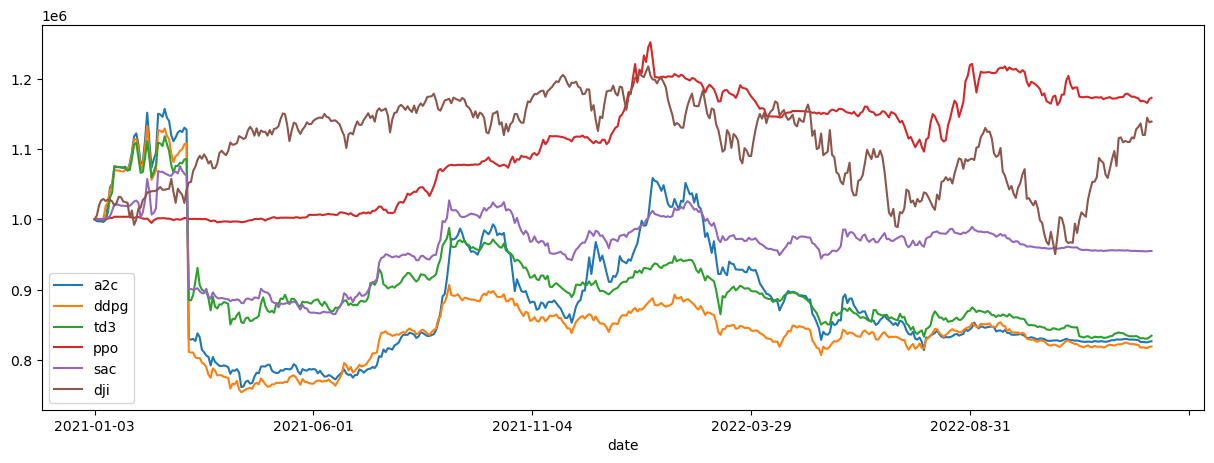

In [83]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();

In [ ]:
# save those models using pickle
import pickle
parent_dir = os.path.join('models', 'original')
if not os.path.exists(parent_dir):
    os.makedirs(parent_dir)

if if_using_a2c:
    with open(os.path.join(parent_dir, 'a2c.pkl'), 'wb') as f:
        pickle.dump(trained_a2c, f)

if if_using_ddpg:
    with open(os.path.join(parent_dir, 'ddpg.pkl'), 'wb') as f:
        pickle.dump(trained_ddpg, f)

if if_using_ppo:
    with open(os.path.join(parent_dir, 'ppo.pkl'), 'wb') as f:
        pickle.dump(trained_ppo, f)

if if_using_td3:
    with open(os.path.join(parent_dir, 'td3.pkl'), 'wb') as f:
        pickle.dump(trained_td3, f)

if if_using_sac:
    with open(os.path.join(parent_dir, 'sac.pkl'), 'wb') as f:
        pickle.dump(trained_sac, f)